## Appendix - Python Code and Outputs

### Data Preparation

First, we will set up this notebook so that it will display multiple outputs for each cell if needed.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Second, we will import the data.  We will view the first five rows of data and the shape of the dataframe to confirm that the data imported correctly.

In [3]:
import pandas as pd
housing_training_data = pd.read_csv('train.csv')

# show first five rows of the data
housing_training_data.head()
# show number of columns and rows
housing_training_data.shape
# show column names, type, and non-null counts
housing_training_data.info(verbose = True, show_counts = True)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Distribution of the Dependent Variable

We can begin examining the distribution of this dataset's dependent variable, sale price, by generating summary statistics for this variable.

In [4]:
housing_training_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We can also construct a histogram and a boxplot to visualize the distribution of the sale price variable in this dataframe.

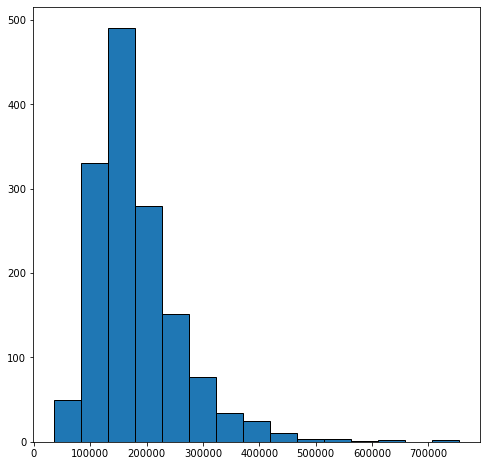

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

histogram = housing_training_data['SalePrice'].hist(edgecolor = 'black', bins = 15, figsize = (8, 8), grid = False)

<AxesSubplot:xlabel='SalePrice'>

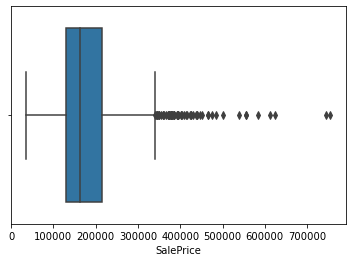

In [6]:
sns.boxplot(x=housing_training_data["SalePrice"])

### Investigation of Missing Data and Outliers

We can take a look at the counts of reported values in each column to determine the number of missing values for each variable in the dataframe.

In [7]:
# find null counts, percentage of null values, and column type
null_count = housing_training_data.isnull().sum()
null_percentage = housing_training_data.isnull().sum() * 100 / len(housing_training_data)
column_type = housing_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
PoolQC,1453,99.520548,object
MiscFeature,1406,96.301370,object
Alley,1369,93.767123,object
Fence,1179,80.753425,object
FireplaceQu,690,47.260274,object
LotFrontage,259,17.739726,float64
GarageType,81,5.547945,object
GarageYrBlt,81,5.547945,float64
GarageFinish,81,5.547945,object
GarageQual,81,5.547945,object


We will deal with columns that contain missing values. For the purpose of this exploratory data analysis, we will use the percentage of nulls missing, the column type, and the other columns present in the data that may provide information that can be used to fill in the missing values.

We will remove columns with over 50% Null values.

In [8]:
# PoolQC, MiscFeature, Alley, Fence all have over 50% of missing values, we will remove those from our dataframe
housing_training_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

# show new shape
housing_training_data.shape

(1460, 77)

We will set Null values in columns that are non-numeric to None.

In [9]:
# select non-numeric columns that contain more than 1 Null value
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond','MasVnrType','Electrical']
# set Nulls in non-numeric columns to 'None'
housing_training_data[columns_None] = housing_training_data[columns_None].fillna('None')

We determine the best way to handle nulls for each numeric column. We replace nulls in Masonry veneer area with 0, nulls in Lot Frontage with the median, and nulls in Year Garage was built with the average between the year the garage was built and year house was built .

In [10]:
# change Null values to 0 for Masonry veneer area
housing_training_data['MasVnrArea'].fillna(0, inplace=True)

# show distribution stats for Lot Frontage
housing_training_data['LotFrontage'].describe()
# fill Nulls for Lot Frontage with median value
housing_training_data['LotFrontage'].fillna(housing_training_data['LotFrontage'].median(), inplace=True)

# average years between garage being built and years built
avg_years = round((housing_training_data['GarageYrBlt'] - housing_training_data['YearBuilt']).mean())
# fill Nulls with avg bet year garage was built and year house was built 
housing_training_data['GarageYrBlt'].fillna(housing_training_data['YearBuilt']+avg_years, inplace=True)

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

We can see there are no more missing values in our original dataframe.

In [11]:
# check that there are no more missing values in the dataframe
null_count = housing_training_data.isnull().sum()
null_count[null_count != 0]

Series([], dtype: int64)

We can also create boxplots for each of the continuous variables in the dataframe to analyze whether outliers exist for each of those variables.

<AxesSubplot:xlabel='LotFrontage'>

<AxesSubplot:xlabel='LotArea'>

<AxesSubplot:xlabel='OverallQual'>

<AxesSubplot:xlabel='OverallCond'>

<AxesSubplot:xlabel='YearBuilt'>

<AxesSubplot:xlabel='YearRemodAdd'>

<AxesSubplot:xlabel='MasVnrArea'>

<AxesSubplot:xlabel='BsmtFinSF1'>

<AxesSubplot:xlabel='BsmtFinSF2'>

<AxesSubplot:xlabel='BsmtUnfSF'>

<AxesSubplot:xlabel='TotalBsmtSF'>

<AxesSubplot:xlabel='1stFlrSF'>

<AxesSubplot:xlabel='2ndFlrSF'>

<AxesSubplot:xlabel='LowQualFinSF'>

<AxesSubplot:xlabel='GrLivArea'>

<AxesSubplot:xlabel='BsmtFullBath'>

<AxesSubplot:xlabel='BsmtHalfBath'>

<AxesSubplot:xlabel='FullBath'>

<AxesSubplot:xlabel='HalfBath'>

<AxesSubplot:xlabel='BedroomAbvGr'>

<AxesSubplot:xlabel='KitchenAbvGr'>

<AxesSubplot:xlabel='TotRmsAbvGrd'>

<AxesSubplot:xlabel='Fireplaces'>

<AxesSubplot:xlabel='GarageYrBlt'>

<AxesSubplot:xlabel='GarageCars'>

<AxesSubplot:xlabel='GarageArea'>

<AxesSubplot:xlabel='WoodDeckSF'>

<AxesSubplot:xlabel='OpenPorchSF'>

<AxesSubplot:xlabel='EnclosedPorch'>

<AxesSubplot:xlabel='3SsnPorch'>

<AxesSubplot:xlabel='ScreenPorch'>

<AxesSubplot:xlabel='PoolArea'>

<AxesSubplot:xlabel='MiscVal'>

<AxesSubplot:xlabel='SalePrice'>

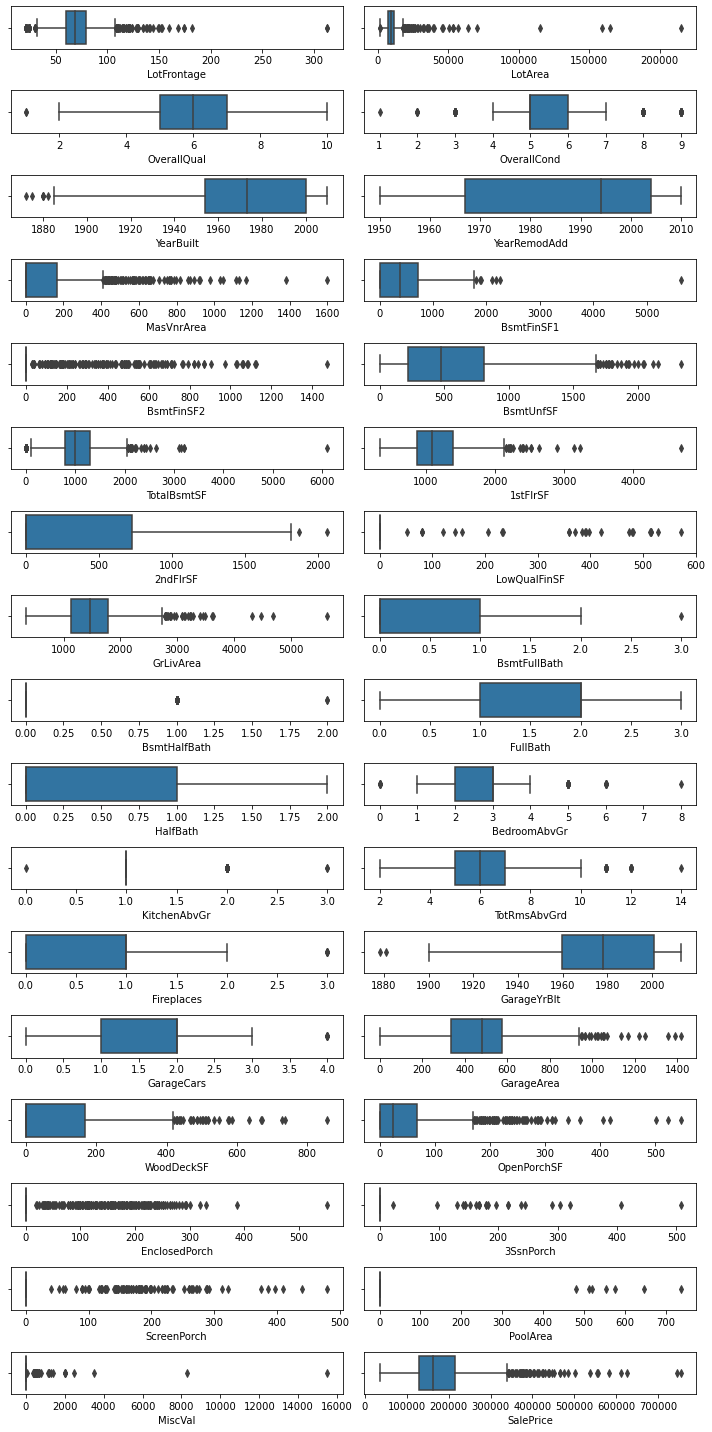

In [12]:
numerical_vars = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

fig, ax = plt.subplots(17, 2, figsize = (10, 20))

for var, subplot in zip(numerical_vars, ax.flatten()):
    sns.boxplot(x=housing_training_data[var], ax = subplot)
    
fig.tight_layout()

### 3.4) Examination of the Relationship between the Dependent Variable and Potential Predictors

We can use a correlation heatmap to quantify the correlation between the dependent variable, sale price, and the potential continuous predictor variables.

<AxesSubplot:>

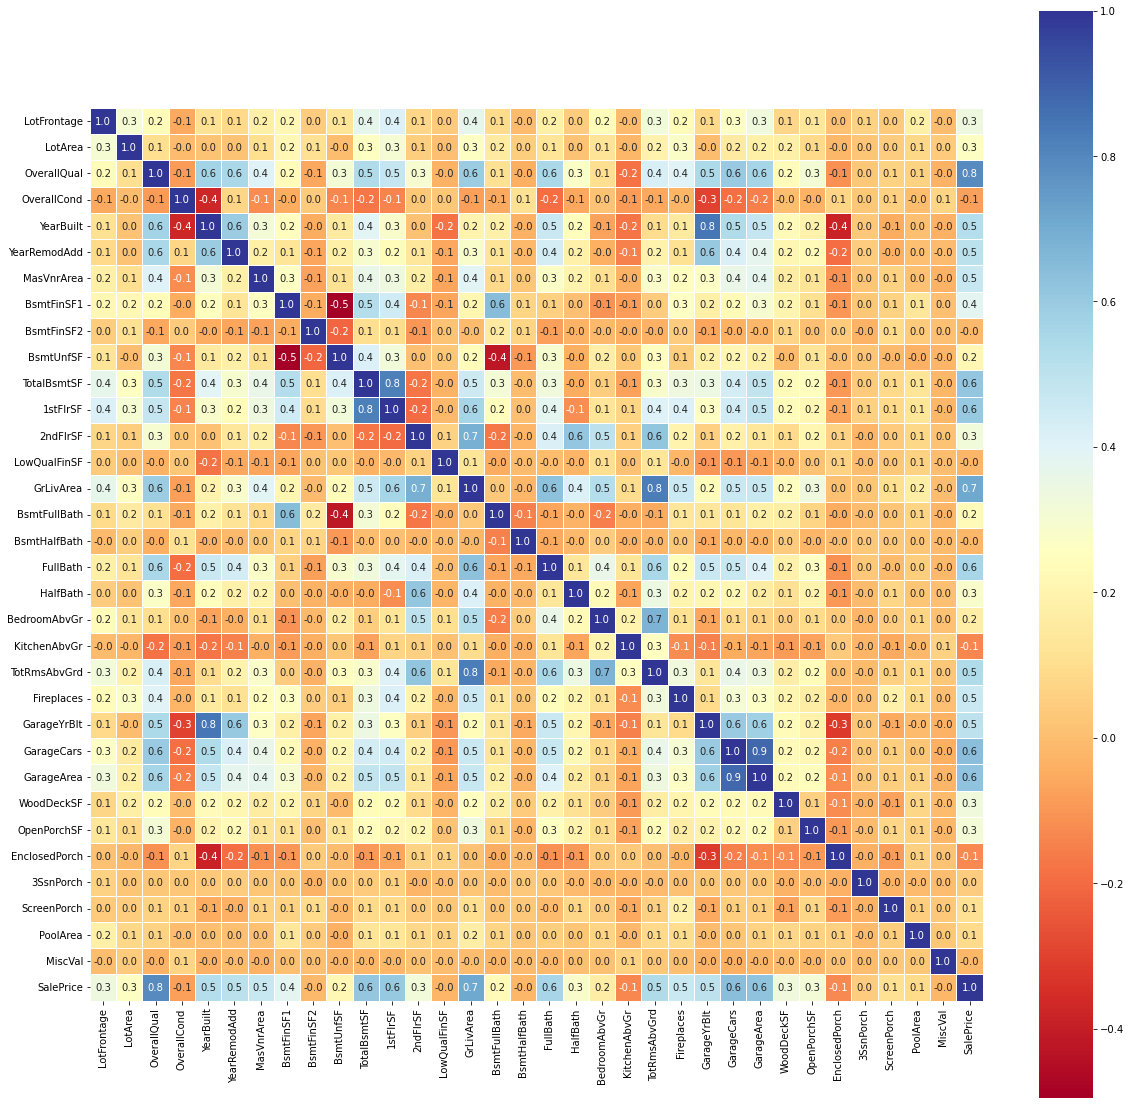

In [13]:
df_corr_housing_training = housing_training_data[numerical_vars]
corrmat_housing_training = df_corr_housing_training.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat_housing_training, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5, fmt=".1f")

In [14]:
#Correlation with output variable
cor_target = abs(corrmat_housing_training["SalePrice"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.503288
Name: SalePrice, dtype: float64

We can use jointplots to take a closer look at the relationship between sale price and five of the continuous variables with which sale price has a strong or moderate association: OverallQual, GrLivArea, GarageArea, Fullbath, and TotalBsmntSF.

Below are Pearson correlations that examine the associations between variables of interest and sale price

In [15]:
from scipy import stats

#Pearson correlation coefficient and p value for sale price and OverallQual (Overall material and finish quality):
res1 = stats.pearsonr(housing_training_data.OverallQual, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and OverallQual (Overall material and finish quality):")
res1
#Pearson correlation coefficient and p value for sale price and GrLivArea (Above grade (ground) living area square feet):
res2 = stats.pearsonr(housing_training_data.GrLivArea, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and GrLivArea (Above grade (ground) living area square feet):")
res2
#Pearson correlation coefficient and p value for sale price and FullBath (Full bathrooms above grade):
res3 = stats.pearsonr(housing_training_data.FullBath, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and FullBath (Full bathrooms above grade):")
res3
#Pearson correlation coefficient and p value for sale price and TotalBsmtSF (Total square feet of basement area):
res4 = stats.pearsonr(housing_training_data.TotalBsmtSF, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and TotalBsmtSF (Total square feet of basement area):")
res4
#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res5 = stats.pearsonr(housing_training_data.GarageArea, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):")
res5

Pearson correlation coefficient and p value for sale price and OverallQual (Overall material and finish quality):


(0.79098160058381, 2.185675268e-313)

Pearson correlation coefficient and p value for sale price and GrLivArea (Above grade (ground) living area square feet):


(0.7086244776126513, 4.518033646787136e-223)

Pearson correlation coefficient and p value for sale price and FullBath (Full bathrooms above grade):


(0.5606637627484407, 1.2364700667685934e-121)

Pearson correlation coefficient and p value for sale price and TotalBsmtSF (Total square feet of basement area):


(0.6135805515591952, 9.484229391508992e-152)

Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):


(0.6234314389183613, 5.265038167981996e-158)

Below are plots that examine the relationship between variables of interest and sale price

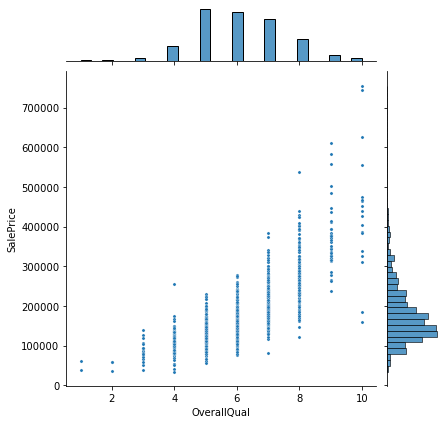

In [16]:
sns.jointplot(x='OverallQual', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

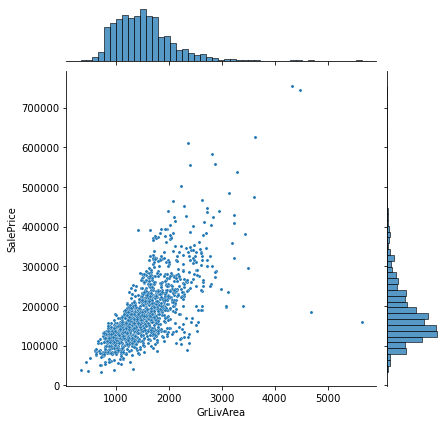

In [17]:
sns.jointplot(x='GrLivArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

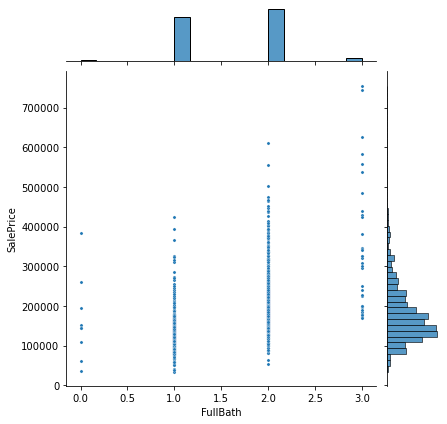

In [18]:
sns.jointplot(x='FullBath', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

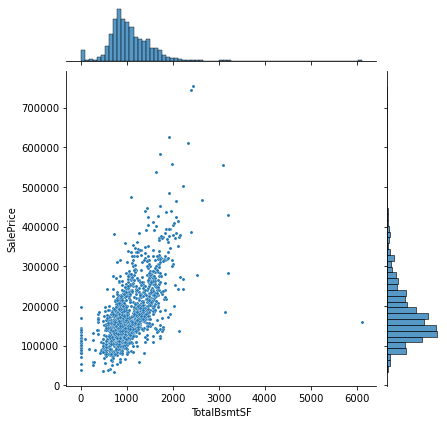

In [19]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

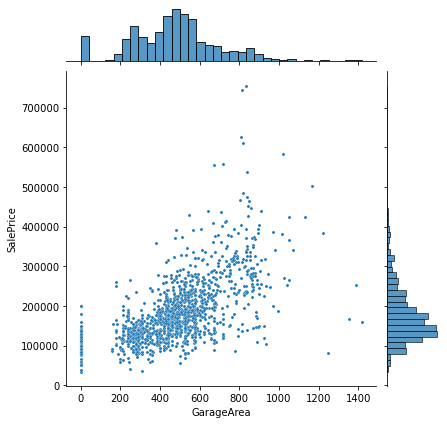

In [20]:
sns.jointplot(x='GarageArea', y='SalePrice', data = housing_training_data, joint_kws={"s": 10});

### Feature Creation

New features may enable us to create more accurate prediction models for home sale prices.  Accordingly, we will create a feature to reflect the number of years since a home has been remodeled.

count    1460.000000
mean       22.950000
std        20.640653
min        -1.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: YrSinceRemod, dtype: float64

<AxesSubplot:xlabel='YrSinceRemod', ylabel='Count'>

Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:


(-0.5090787380156278, 4.3748554463830306e-97)

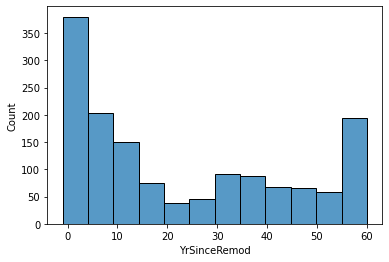

In [21]:
# create new variable, years since the house has been remodeled from selling date (use construction date if no remodeling or additions)
housing_training_data['YrSinceRemod'] = housing_training_data['YrSold'] - housing_training_data['YearRemodAdd']
housing_training_data['YrSinceRemod'].describe()
sns.histplot(data=housing_training_data, x="YrSinceRemod")

#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res6 = stats.pearsonr(housing_training_data.YrSinceRemod, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and Years since House was remodeled/built:")
res6

We will also create a feature to reflect the number of total square feet in a home.

count     1460.000000
mean      2572.893151
std        823.598492
min        334.000000
25%       2014.000000
50%       2479.000000
75%       3008.500000
max      11752.000000
Name: TotalSF, dtype: float64

<AxesSubplot:xlabel='TotalSF', ylabel='Count'>

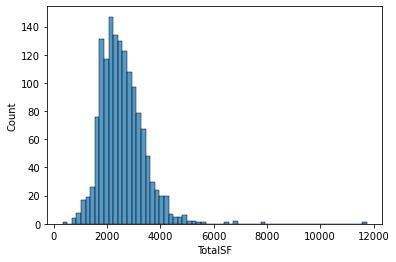

In [22]:
# create new variable TotalSF
housing_training_data['TotalSF'] = housing_training_data['TotalBsmtSF'] + housing_training_data['GrLivArea']
housing_training_data['TotalSF'].describe()
# visualize distribution
sns.histplot(data=housing_training_data, x="TotalSF")

<AxesSubplot:xlabel='TotalSF', ylabel='Count'>

Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):


(0.8199962912972798, 0.0)

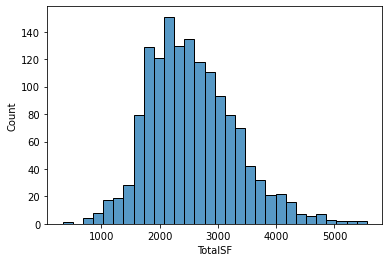

In [23]:
# drop large outlier from the dataframe
housing_training_data.drop(housing_training_data[housing_training_data['TotalSF'] > 6000].index, inplace=True)
# visualize distribution without extreme outliers
sns.histplot(data=housing_training_data, x="TotalSF")

#Pearson correlation coefficient and p value for sale price and GarageArea (Size of garage in square feet):
res7 = stats.pearsonr(housing_training_data.TotalSF, housing_training_data.SalePrice)
print("Pearson correlation coefficient and p value for sale price and TotalSF (Total square feet - includes basement):")
res7

### Constructing Models to Predict Home Prices

Below are simple and multiple regressions that examine the associations between variables of interest and sale price.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2982.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:35:55   Log-Likelihood:                -17613.
No. Observations:                1455   AIC:                         3.523e+04
Df Residuals:                    1453   BIC:                         3.524e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.239e+04   4054.647     -7.989      0.0

<AxesSubplot:xlabel='TotalSF', ylabel='SalePrice'>

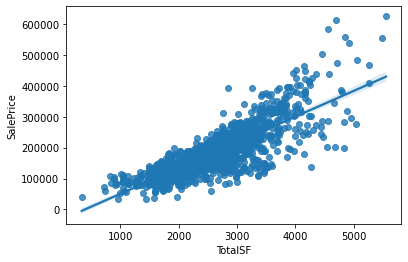

In [24]:
import numpy as np
import statsmodels.api as sm
# New feature is highly correlated, lets try a simple linear regression
x = housing_training_data['TotalSF']
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y)

Lets see how an exponential model fits the data. Since the scatterplot shows a potential exponential relationship between sales price and square footage.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     2934.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:36:01   Log-Likelihood:                 89.766
No. Observations:                1455   AIC:                            -175.5
Df Residuals:                    1453   BIC:                            -165.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9256      0.021    518.068      0.0

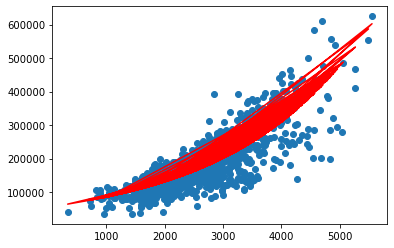

In [25]:
from scipy.optimize import curve_fit

# Define the exponential function to fit
# New feature is highly correlated, lets try a simple linear regression
x = housing_training_data['TotalSF']
y = housing_training_data['SalePrice']
# Create a log-transformed version of the dependent variable
y_log = np.log(y)

# Add a constant to the independent variable
x_const = sm.add_constant(x)

# Create the exponential model
model = sm.OLS(y_log, x_const).fit()

# Print the model summary
print(model.summary())

# Plot the data and the fitted curve
plt.scatter(x, y)
plt.plot(x, np.exp(model.predict(x_const)), 'r-')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     2605.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:36:07   Log-Likelihood:                -17677.
No. Observations:                1455   AIC:                         3.536e+04
Df Residuals:                    1453   BIC:                         3.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.231e+04   5468.337    -16.880      

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

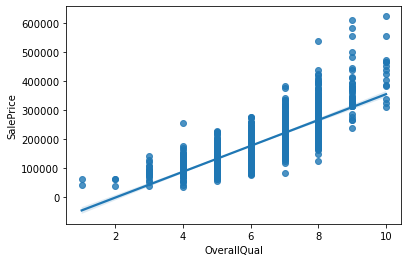

In [26]:
#Simple linear regression for sale price and OverallQual (Overall material and finish quality):
x = housing_training_data['OverallQual']
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

# plot the regression model
sns.regplot(x=x, y=y)

Check the correlation between the two new variables. If they are highly correlated we won't construct a mutliple linear regression model with the both of those variables as predictors.

In [27]:
df_corr_mult_lreg = housing_training_data[['TotalSF','YrSinceRemod']]
df_corr_mult_lreg.corr()

,TotalSF,YrSinceRemod
TotalSF,1.000000,-0.352279
YrSinceRemod,-0.352279,1.000000


TotalSF and YrSinceRemod are not highly correlated so we will construct a multiple linear regression model using the two variables as predictors.

In [28]:
x = housing_training_data[['TotalSF','YrSinceRemod']]
y = housing_training_data['SalePrice']

#add constant to predictor variables
X = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2019.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:36:16   Log-Likelihood:                -17457.
No. Observations:                1455   AIC:                         3.492e+04
Df Residuals:                    1452   BIC:                         3.494e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.497e+04   4443.956      3.369   

An r-squared value of 0.725 means that the model explains 72.5 percent of the variance in the dependent variable. The adjusted R-squared value is about the same as the r-squared value, indicating that we aren't overfitting the model by addding multiple variables. The omnibus test, however, indicates that residuals are not normally distributed and the high kurtosis value indicates that the distribution of the residuals are more peaked than a normal distribution. The condition number is 1.12e+04, which is quite high and suggests that there may be multicollinearity in the model.

We will try and add Garage Cars as a predictor in our model. First, lets observe the correlation between the existing predictors.

In [29]:
df_corr_mult_lreg = housing_training_data[['TotalSF','YrSinceRemod','GarageCars']]
df_corr_mult_lreg.corr()

,TotalSF,YrSinceRemod,GarageCars
TotalSF,1.000000,-0.352279,0.556693
YrSinceRemod,-0.352279,1.000000,-0.422033
GarageCars,0.556693,-0.422033,1.000000


The correlation between garage cars and total square feet is moderately high. We will take that into consideration when analyzing the output of the model.

In [30]:
x = housing_training_data[['TotalSF','GarageCars','YrSinceRemod']]
y = housing_training_data['SalePrice']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1565.
Date:                Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:36:26   Log-Likelihood:                -17374.
No. Observations:                1455   AIC:                         3.476e+04
Df Residuals:                    1451   BIC:                         3.478e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2389.4479   4401.862     -0.543   

### Scaling of the Dependent Variable

We can create a copy of the sale price variable that has been standardized via standard scaling.  We can examine the summary statistics of this new variable to confirm we've applied standard scaling correctly to this new variable.

In [31]:
from sklearn import preprocessing
standardized_sale_price = preprocessing.scale(housing_training_data['SalePrice'])
housing_training_data['standardized_sale_price'] = standardized_sale_price.tolist()

housing_training_data['standardized_sale_price'].describe()

count    1.455000e+03
mean    -1.165543e-16
std      1.000344e+00
min     -1.898544e+00
25%     -6.553522e-01
50%     -2.221979e-01
75%      4.419284e-01
max      5.823641e+00
Name: standardized_sale_price, dtype: float64

Given that the mean of the new standardized sale price variable is (approximately) 0 and the standard deviation of the new standardized sale price variable is (approximately) 1, we can have confidence that we performed the appropriate transformation correctly and successfully.

Similarly, we can create a copy of the sale price variable that has been standardized via min-max scaling.  Then, we can examine the summary statistics of this new variable to confirm we've applied min-max scaling correctly to this new variable.

In [32]:
import os
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
housing_training_data[['min_max_scaled_sale_price']] = scaler.fit_transform(housing_training_data[['SalePrice']])

housing_training_data.shape
housing_training_data.head()

housing_training_data['min_max_scaled_sale_price'].describe()

(1455, 81)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrSinceRemod,TotalSF,standardized_sale_price,min_max_scaled_sale_price
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500,5,2566,0.373226,0.294187
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500,31,2524,0.019897,0.248432
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500,6,2706,0.569519,0.319607
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000,36,2473,-0.523181,0.178105
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000,8,3343,0.916304,0.364514


count    1455.000000
mean        0.245856
std         0.129542
min         0.000000
25%         0.160990
50%         0.217082
75%         0.303084
max         1.000000
Name: min_max_scaled_sale_price, dtype: float64

Given that the maximum value in the new min-max scaled sale price variable is 1 and the minimum value in the new min-max scaled sale price variable is 1, we can have confidence that we performed the appropriate transformation correctly and successfully.

We can create regression models using these regularized sale prices to determine whether the resulting regression model substantially outperform the regression models that predict the un-transformed sale prices.  First, we can create a regression model that predicts sale prices regularized via standard scaling.

In [33]:
x = housing_training_data[['TotalSF','GarageCars','YrSinceRemod']]
y = housing_training_data['standardized_sale_price']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     standardized_sale_price   R-squared:                       0.764
Model:                                 OLS   Adj. R-squared:                  0.763
Method:                      Least Squares   F-statistic:                     1565.
Date:                     Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                             08:36:44   Log-Likelihood:                -1014.4
No. Observations:                     1455   AIC:                             2037.
Df Residuals:                         1451   BIC:                             2058.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Next we can create a regression model that predicts sale prices regularized via min-max scaling.

In [34]:
x = housing_training_data[['TotalSF','GarageCars','YrSinceRemod']]
y = housing_training_data['min_max_scaled_sale_price']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     min_max_scaled_sale_price   R-squared:                       0.764
Model:                                   OLS   Adj. R-squared:                  0.763
Method:                        Least Squares   F-statistic:                     1565.
Date:                       Sun, 02 Apr 2023   Prob (F-statistic):               0.00
Time:                               08:37:23   Log-Likelihood:                 1959.7
No. Observations:                       1455   AIC:                            -3911.
Df Residuals:                           1451   BIC:                            -3890.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------